## 🧰 Importación de Librerías y Configuración Visual

En esta sección se importan las principales librerías de análisis y visualización de datos:

- **pandas:** Manipulación y análisis eficiente de datos tabulares.
- **seaborn:** Visualización estadística avanzada y estética.
- **matplotlib:** Personalización y control detallado de gráficos.

Además, se define un estilo visual uniforme y amigable para todos los gráficos del notebook, facilitando la interpretación y comparación de resultados.


In [12]:
# 🧰 Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Configuración visual
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

## 📂 Carga y Preparación de los Datos

En este bloque se realiza la carga del dataset procesado y la preparación de los datos para el análisis por sexo:

- **Carga de datos:** Se lee el archivo consolidado de desocupación.
- **Filtrado:** Se seleccionan únicamente los registros cuya dimensión corresponde a sexo.
- **Conversión de fechas:** Se transforma la columna `periodo` a formato datetime para facilitar el análisis temporal.
- **Renombrado de columnas:** Se renombra la columna `categoria` a `Sexo` para mayor claridad.
- **Traducción de etiquetas:** Se traducen los códigos de sexo (`M`, `F`, `_T`) a etiquetas legibles ("Hombres", "Mujeres", "Total").


In [13]:
# 📂 Cargar datos
df = pd.read_csv("../data/processed/poblacion_desocupada_combinado.csv")

# 🧼 Filtrar solo datos por sexo
df_sexo = df[df["dimension"] == "sexo"].copy()
df_sexo["periodo"] = pd.to_datetime(df_sexo["periodo"].astype(str).str[:10])
df_sexo.rename(columns={"categoria": "Sexo"}, inplace=True)

# 🏷️ Traducir códigos de sexo a etiquetas legibles
traducciones = {"M": "Hombres", "F": "Mujeres", "_T": "Total"}
df_sexo["Sexo"] = df_sexo["Sexo"].map(traducciones)

## 📊 Visualización del Desempleo por Sexo

En este bloque se genera una visualización temporal de la evolución del desempleo en la Región de Los Ríos, diferenciando por sexo.  
Esto permite identificar tendencias, brechas de género y periodos de mayor vulnerabilidad para hombres y mujeres.

- **Eje X:** Fecha (periodo)
- **Eje Y:** Número de personas desocupadas
- **Colores:** Diferenciación por sexo (Hombres, Mujeres, Total)
- **Banda de error:** Desviación estándar para visualizar la variabilidad temporal


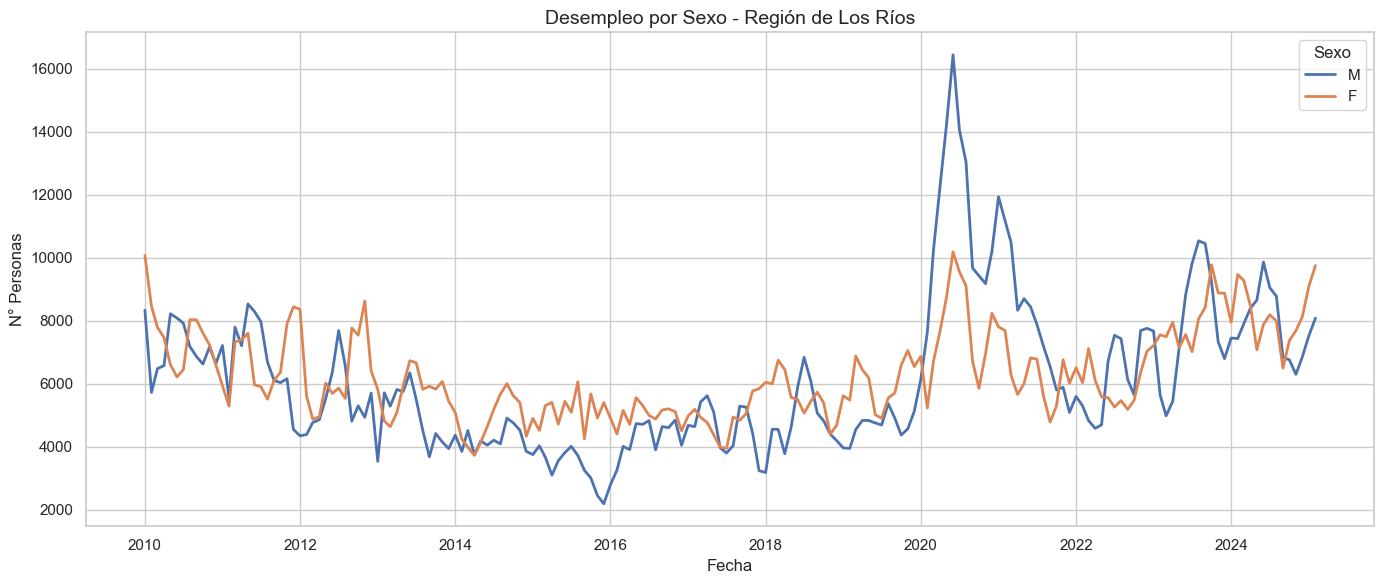

In [29]:
# Filtrar solo registros con sexo M o F
df_sexo = df[df["dimension"] == "sexo"].copy()
df_sexo = df_sexo[df_sexo["categoria"].isin(["M", "F"])]
df_sexo["periodo"] = pd.to_datetime(df_sexo["periodo"].astype(str).str[:10])
df_sexo.rename(columns={"categoria": "Sexo"}, inplace=True)

# 📊 Visualización del desempleo por sexo
plt.figure()
sns.lineplot(
    data=df_sexo,
    x="periodo",
    y="valor",
    hue="Sexo",
    errorbar="sd",
    linewidth=2.0
)
plt.title("Desempleo por Sexo - Región de Los Ríos", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("N° Personas")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

In [11]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("../data/processed/poblacion_desocupada_combinado.csv")
df_sexo = df[df["dimension"] == "sexo"].copy()
df_sexo["periodo"] = pd.to_datetime(df_sexo["periodo"].astype(str).str[:10])
etiquetas_sexo = {"F": "Mujeres", "M": "Hombres", "_T": "Total"}
df_sexo["Sexo"] = df_sexo["categoria"].map(etiquetas_sexo)
df_sexo_filtrado = df_sexo[df_sexo["Sexo"].isin(["Hombres", "Mujeres"])]
# Paleta estilo The Economist: amarillo, azul, gris
economist_colors = ["#FFD700", "#1E88E5", "#757575"]
# Función de estilo The Economist con solo gridlines horizontales
def apply_economist_style(fig):
    fig.update_layout(
        font=dict(family='Georgia, serif', color='#1e293b'),
        title=dict(font=dict(size=18, family='Georgia, serif', color='#1e293b')),
        xaxis=dict(
            title=dict(font=dict(family='Georgia, serif')),
            tickfont=dict(family='Georgia, serif'),
            showgrid=False,
            zeroline=False
        ),
        yaxis=dict(
            title=dict(font=dict(family='Georgia, serif')),
            tickfont=dict(family='Georgia, serif'),
            showgrid=True,
            gridcolor='#e0e0e0',
            zeroline=False
        ),
        legend=dict(font=dict(family='Georgia, serif')),
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=60, r=40, t=80, b=60)
    )
    return fig
# Series para cada grupo
data_hombres = df_sexo_filtrado[df_sexo_filtrado["Sexo"] == "Hombres"]
data_mujeres = df_sexo_filtrado[df_sexo_filtrado["Sexo"] == "Mujeres"]
data_ambos = df_sexo_filtrado.groupby("periodo")["valor"].sum().reset_index()
# Función para obtener los puntos de enero de cada año
def get_year_points(df):
    return df[df['periodo'].dt.month == 1]
# Crear figura con líneas y puntos levemente más grandes solo en enero de cada año
fig = go.Figure()
# Hombres
fig.add_trace(go.Scatter(
    x=data_hombres["periodo"],
    y=data_hombres["valor"],
    mode='lines',
    line=dict(color=economist_colors[1], width=2),
    name='Hombres',
    visible=True
))
year_points_hombres = get_year_points(data_hombres)
fig.add_trace(go.Scatter(
    x=year_points_hombres["periodo"],
    y=year_points_hombres["valor"],
    mode='markers',
    marker=dict(size=7, color=economist_colors[1]),
    name='Año Hombres',
    showlegend=False
))
# Mujeres
fig.add_trace(go.Scatter(
    x=data_mujeres["periodo"],
    y=data_mujeres["valor"],
    mode='lines',
    line=dict(color=economist_colors[0], width=2),
    name='Mujeres',
    visible=True
))
year_points_mujeres = get_year_points(data_mujeres)
fig.add_trace(go.Scatter(
    x=year_points_mujeres["periodo"],
    y=year_points_mujeres["valor"],
    mode='markers',
    marker=dict(size=7, color=economist_colors[0]),
    name='Año Mujeres',
    showlegend=False
))
# Ambos sexos
fig.add_trace(go.Scatter(
    x=data_ambos["periodo"],
    y=data_ambos["valor"],
    mode='lines',
    line=dict(color='black', width=2),
    name='Ambos sexos',
    visible=True
))
year_points_ambos = get_year_points(data_ambos)
fig.add_trace(go.Scatter(
    x=year_points_ambos["periodo"],
    y=year_points_ambos["valor"],
    mode='markers',
    marker=dict(size=7, color='black'),
    name='Año Ambos sexos',
    showlegend=False
))
fig = apply_economist_style(fig)
fig.update_layout(
    title="Desempleo por Sexo - Región de Los Ríos",
    xaxis_title="Período",
    yaxis_title="Número de Personas Desocupadas",
    height=500,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5, font=dict(size=13), title=None)
)
fig.update_yaxes(tickformat=',')
fig.show()